In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

importing the dataset

In [22]:
data=pd.read_csv('D:\PROJECTS\project csv files\Conditions_Contributing_to_COVID-19_Deaths__by_State_and_Age__Provisional_2020-2023.csv')

finding the number of rows on the dataset

In [23]:
data.columns

Index(['Data As Of', 'Start Date', 'End Date', 'Group', 'Year', 'Month',
       'State', 'Condition Group', 'Condition', 'ICD10_codes', 'Age Group',
       'COVID-19 Deaths', 'Number of Mentions', 'Flag'],
      dtype='object')

finding the null values

In [24]:
data.isnull().sum()

Data As Of                 0
Start Date                 0
End Date                   0
Group                      0
Year                   12420
Month                  62100
State                      0
Condition Group            0
Condition                  0
ICD10_codes                0
Age Group                  0
COVID-19 Deaths       183449
Number of Mentions    177577
Flag                  437551
dtype: int64

checking for the duplicates rows

In [25]:
data=data.drop_duplicates(keep='first')

How do COVID-19 deaths vary across different age groups and states over time?

COVID-19 deaths across various age groups 0-24: 66585.0
COVID-19 deaths across various age groups 25-34: 230631.0
COVID-19 deaths across various age groups 35-44: 617533.0
COVID-19 deaths across various age groups 45-54: 1568480.0
COVID-19 deaths across various age groups 55-64: 3669196.0
COVID-19 deaths across various age groups 65-74: 6038873.0
COVID-19 deaths across various age groups 75-84: 6994508.0
COVID-19 deaths across various age groups 85+: 6862331.0
COVID-19 deaths across various age groups Not stated: 273.0
COVID-19 deaths across various age groups All Ages: 26509306.0


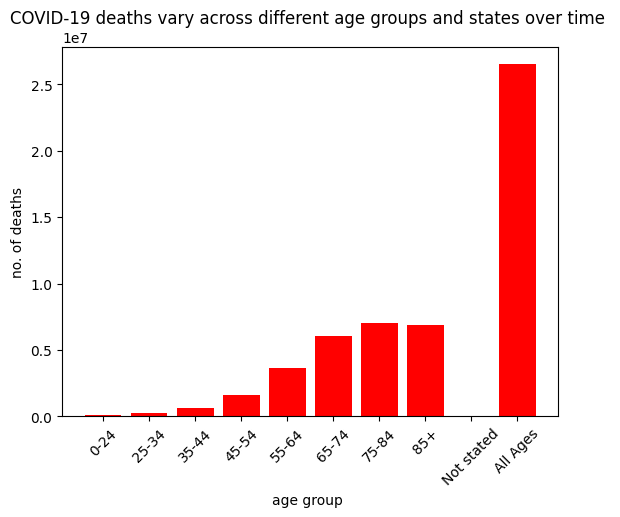

In [26]:
diseases=data['Age Group'].value_counts()
diseases_ind=diseases.index
l1=[]
l2=[]
for i in diseases_ind:
    a=data.groupby('Age Group')[['COVID-19 Deaths']].get_group(i)
    total_deaths = a['COVID-19 Deaths'].sum()
    print(f"COVID-19 deaths across various age groups {i}: {total_deaths}")
    l1.append(i)
    l2.append(total_deaths)
    #print(f"covid 19 deaths across various age group {i}",a.values.sum())
    #l1.append(i)
    #l2.append(a.values.sum())

plt.bar(l1,l2,color='r')
plt.xlabel("age group ")
plt.ylabel("no. of deaths") 
plt.xticks(rotation=45)
plt.title("COVID-19 deaths vary across different age groups and states over time ")
plt.show()
    


In [27]:
data['COVID-19 Deaths'].sum()

52557716.0

Which condition groups or specific conditions are most commonly associated with COVID-19 deaths?

Condition Group
All other conditions and causes (residual)                                    5719965.0
Alzheimer disease                                                              409248.0
COVID-19                                                                     13769328.0
Circulatory diseases                                                          9686450.0
Diabetes                                                                      2002675.0
Intentional and unintentional injury, poisoning, and other adverse events      347931.0
Malignant neoplasms                                                            833784.0
Obesity                                                                        615454.0
Renal failure                                                                 1533795.0
Respiratory diseases                                                         15130539.0
Sepsis                                                                        1408184.0
Vascular and uns

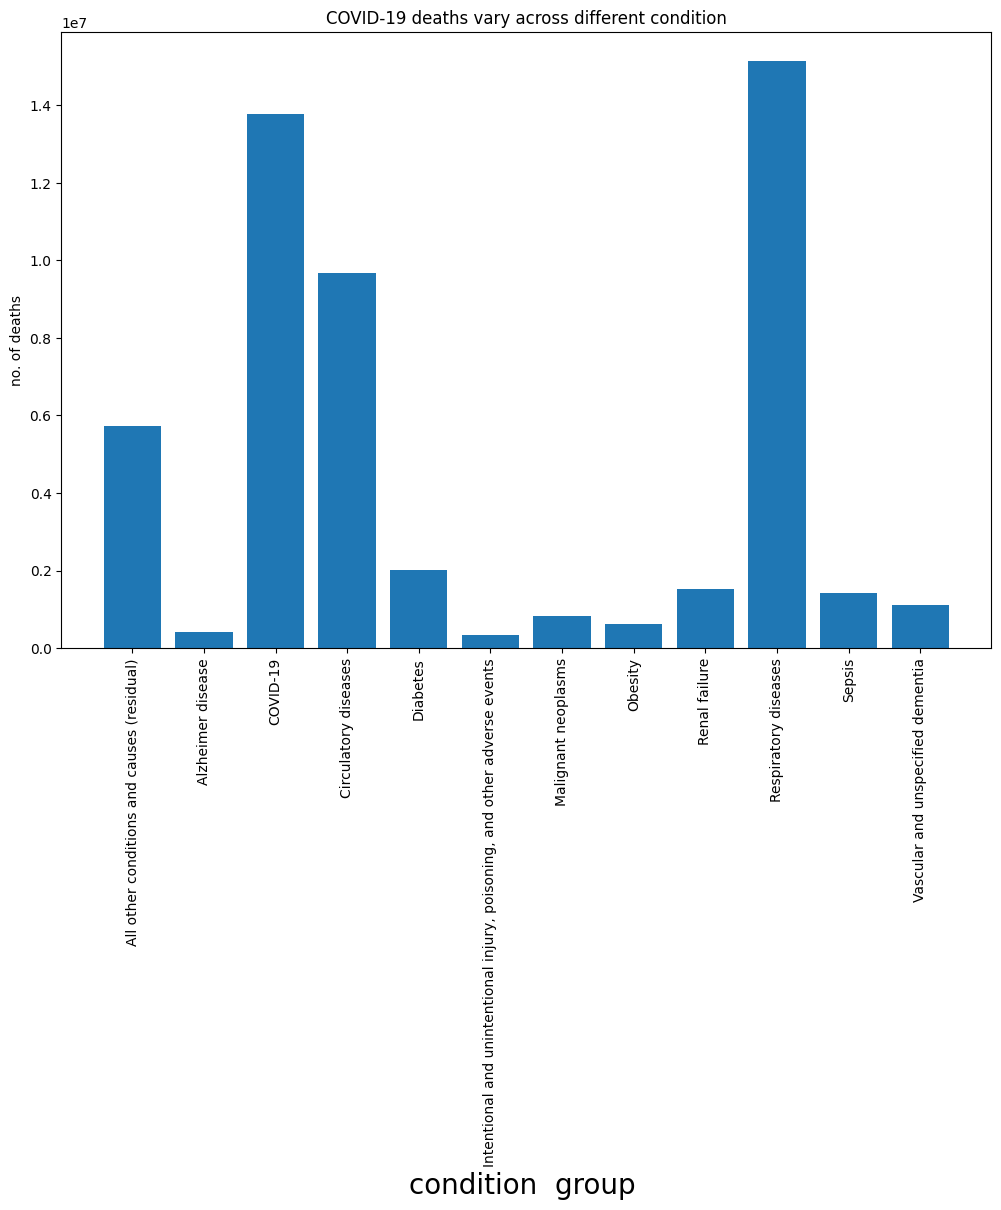

In [28]:
condition_group=data.groupby('Condition Group')['COVID-19 Deaths'].sum()
print(condition_group)
plt.figure(figsize=(12, 8))
plt.bar(condition_group.index,condition_group.values)
plt.xlabel("condition  group ",size=20)
plt.ylabel("no. of deaths") 
plt.xticks(rotation=90)
plt.title("COVID-19 deaths vary across different condition")
plt.show()
    

How do COVID-19 deaths compare between different states?

State
United States           26501616.0
California               2765450.0
Texas                    2453758.0
Florida                  1915568.0
Pennsylvania             1190005.0
Ohio                     1090446.0
New York                  912528.0
Illinois                  857240.0
New Jersey                818458.0
Georgia                   797183.0
Michigan                  766221.0
North Carolina            761941.0
New York City             713151.0
Arizona                   675395.0
Tennessee                 673816.0
Indiana                   630686.0
Kentucky                  512253.0
South Carolina            483097.0
Missouri                  477690.0
Virginia                  460649.0
Massachusetts             454212.0
Oklahoma                  438130.0
Alabama                   432004.0
Maryland                  423271.0
Wisconsin                 402985.0
Washington                390447.0
Colorado                  388689.0
Minnesota                 383921.0
Louisiana     

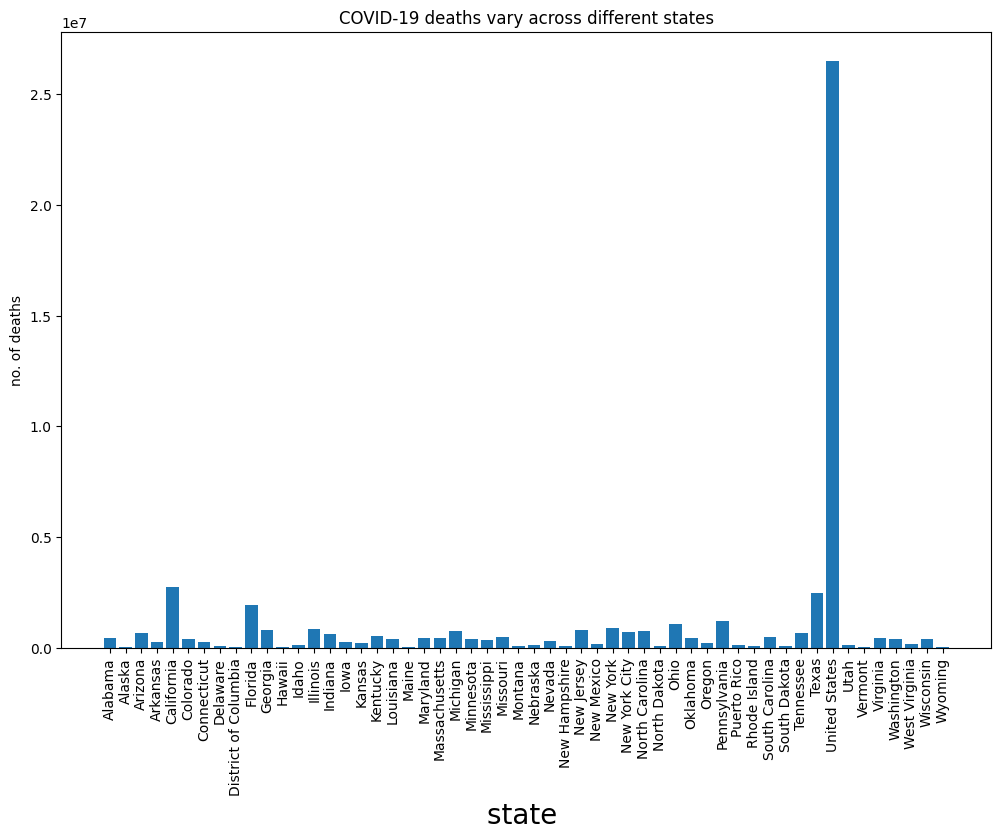

In [29]:
deathss=data.groupby('State')['COVID-19 Deaths'].sum()
print(deathss.sort_values(ascending=False))
plt.figure(figsize=(12, 8))
plt.bar(deathss.index,deathss.values)
plt.xlabel("state ",size=20)
plt.ylabel("no. of deaths") 
plt.xticks(rotation=90)
plt.title("COVID-19 deaths vary across different states")
plt.show()
    


 ICD-10 codes that are consistently associated with COVID-19 deaths

In [30]:
codes= data['ICD10_codes'].value_counts()
#print(codes)
codes_ind=codes.index
codes_val=codes.values
l1=[]
l2=[]
l3=[]
l4=[]
for i in codes_ind:
    icdcode=data.groupby("ICD10_codes")[['COVID-19 Deaths','State']].get_group(i)
    countt=icdcode['State'].count()
    l1.append(icdcode['State'])
    l2.append(icdcode['COVID-19 Deaths'].sum())
    l3.append(i)
    l4.append(len(icdcode['State'].value_counts().index))
fr = list(zip(l3, l2, l1,l4))
frame = pd.DataFrame(fr, columns=['ICD10_codes', 'COVID-19 Deaths', 'State',"No. of states involve"])

In [31]:
data['ICD10_codes'].value_counts()

ICD10_codes
J09-J18                                                                                                                                                                                 27000
I00-I09, I26-I43, I51, I52, I70-I99                                                                                                                                                     27000
A00-A39, A42-B99, D00-E07, E15-E64, E70-E90, F00, F02, F04-G26, G31-H95, K00-K93, L00-M99, N00-N16, N20-N98, O00-O99, P00-P96, Q00-Q99, R00-R08, R09.0, R09.1, R09.3, R09.8, R10-R99    27000
S00-T98, V01-X59, X60-X84, X85-Y09, Y10-Y36, Y40-Y89, U01-U03                                                                                                                           27000
N17-N19                                                                                                                                                                                 27000
F01, F03                              